In [7]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from collections import defaultdict

In [8]:
# 讀取 JSON 檔案
with open("test/test_0228_1314_gamble.json", "r", encoding="utf-8") as file:
    data = json.load(file)

In [9]:
# 假設你的 JSON 存在變數 data
unique_texts = set()
filtered_data = []

filtered_group = []
for item in data:
    if item["text"] not in unique_texts:
        unique_texts.add(item["text"])
        filtered_data.append(item)

In [10]:
# 計算正確的標記數量
correct_predictions = sum(1 for item in filtered_data if item["label"] == item["predict"])

# 總樣本數
total_samples = len(filtered_data)

# 計算準確率
accuracy = correct_predictions / total_samples if total_samples > 0 else 0

print(f"總樣本數: {total_samples}")
print(f"預測正確數: {correct_predictions}")
print(f"準確率: {accuracy:.2%}")

總樣本數: 300
預測正確數: 151
準確率: 50.33%


In [11]:
# 建立字典來儲存 keyword 分類統計
keyword_stats = {}

# 遍歷數據
for item in filtered_data:
    keyword = item["keyword"]
    label = item["label"]
    predict = item["predict"]

    # 初始化該 keyword 的計數
    if keyword not in keyword_stats:
        keyword_stats[keyword] = {"total": 0, "correct": 0}

    # 更新計數
    keyword_stats[keyword]["total"] += 1
    if label == predict:
        keyword_stats[keyword]["correct"] += 1

# 轉換為 DataFrame 以表格顯示
df = pd.DataFrame([
    {
        "Keyword": keyword,
        "總樣本數": stats["total"],
        "預測正確數": stats["correct"],
        "準確率 (%)": round((stats["correct"] / stats["total"]) * 100, 2) if stats["total"] > 0 else 0
    }
    for keyword, stats in keyword_stats.items()
])

# 顯示表格
df

,Keyword,總樣本數,預測正確數,準確率 (%)
0,娛樂城,100,55,55.0
1,百家樂,100,52,52.0
2,運彩,100,44,44.0


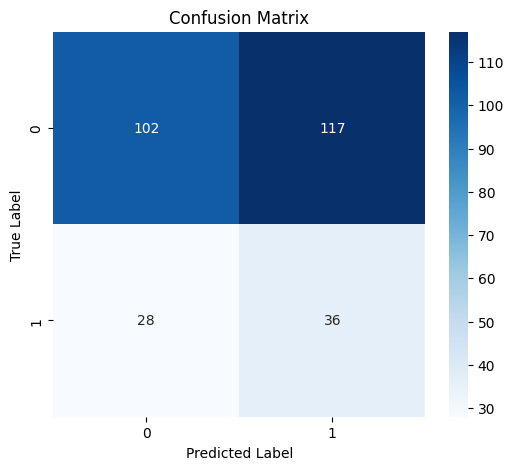

In [6]:
# 取得所有標籤 (避免遺漏某些類別)
labels = list(set(item["label"] for item in filtered_data))

# 計算混淆矩陣
y_true = [item["label"] for item in filtered_data]
y_pred = [item["predict"] for item in filtered_data]
cm = confusion_matrix(y_true, y_pred, labels=labels)

# 繪製熱力圖
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(6, 5))
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [7]:
# 讀取 JSON 檔案
with open("test/test_0302_1651_emotional_dating.json", "r", encoding="utf-8") as file:
    data = json.load(file)

In [8]:
# 假設你的 JSON 存在變數 data
unique_texts = set()
filtered_data = []

filtered_group = []
for item in data:
    if item["text"] not in unique_texts:
        unique_texts.add(item["text"])
        filtered_data.append(item)

In [9]:
# 計算正確的標記數量
correct_predictions = sum(1 for item in filtered_data if item["label"] == item["predict"])

# 總樣本數
total_samples = len(filtered_data)

# 計算準確率
accuracy = correct_predictions / total_samples if total_samples > 0 else 0

print(f"總樣本數: {total_samples}")
print(f"預測正確數: {correct_predictions}")
print(f"準確率: {accuracy:.2%}")

總樣本數: 249
預測正確數: 138
準確率: 55.42%


In [10]:
# 建立字典來儲存 keyword 分類統計
keyword_stats = {}

# 遍歷數據
for item in filtered_data:
    keyword = item["keyword"]
    label = item["label"]
    predict = item["predict"]

    # 初始化該 keyword 的計數
    if keyword not in keyword_stats:
        keyword_stats[keyword] = {"total": 0, "correct": 0}

    # 更新計數
    keyword_stats[keyword]["total"] += 1
    if label == predict:
        keyword_stats[keyword]["correct"] += 1

# 轉換為 DataFrame 以表格顯示
df = pd.DataFrame([
    {
        "Keyword": keyword,
        "總樣本數": stats["total"],
        "預測正確數": stats["correct"],
        "準確率 (%)": round((stats["correct"] / stats["total"]) * 100, 2) if stats["total"] > 0 else 0
    }
    for keyword, stats in keyword_stats.items()
])

# 顯示表格
df

,Keyword,總樣本數,預測正確數,準確率 (%)
0,約炮,72,49,68.06
1,徵男友,85,39,45.88
2,徵女友,92,50,54.35


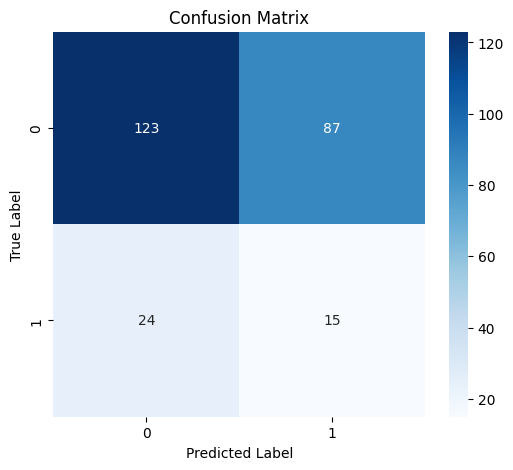

In [11]:
# 取得所有標籤 (避免遺漏某些類別)
labels = list(set(item["label"] for item in filtered_data))

# 計算混淆矩陣
y_true = [item["label"] for item in filtered_data]
y_pred = [item["predict"] for item in filtered_data]
cm = confusion_matrix(y_true, y_pred, labels=labels)

# 繪製熱力圖
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(6, 5))
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()